In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19/Latest Covid-19 India Status.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = "/kaggle/input/covid19/Latest Covid-19 India Status.csv"
df = pd.read_csv(filename)
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
0,Maharashtra,5963420,135708,5710356,117356,2.28,95.76,1.97
1,Karnataka,2801936,130894,2637279,33763,4.67,94.12,1.20
2,Kerala,2797747,107300,2678499,11948,3.84,95.74,0.43
3,Tamil Nadu,2414680,78780,2304885,31015,3.26,95.45,1.28
4,Andhra Pradesh,1844917,65244,1767404,12269,3.54,95.80,0.67


<Figure size 864x504 with 0 Axes>

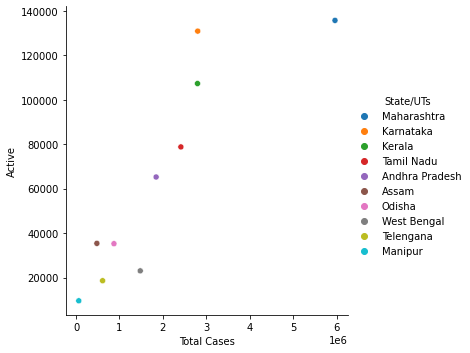

In [4]:
#Getting an idea of Active cases in top 10 states of India
data_AC=df.sort_values(by="Active", ascending=False, axis=0)

plt.figure(figsize=(12,7))

# Slicing the dataframe to plot only the top 10s
AC = data_AC.iloc[0:10]
sns.relplot(x='Total Cases',y='Active',data=AC, hue= 'State/UTs')

In [5]:
#Overall Correlation between factors
sub_df = df[['State/UTs','Total Cases','Active','Discharged','Deaths']]
sub_df.corr()

,Total Cases,Active,Discharged,Deaths
Total Cases,1.000000,0.872739,0.999906,0.922155
Active,0.872739,1.000000,0.866654,0.711974
Discharged,0.999906,0.866654,1.000000,0.922377
Deaths,0.922155,0.711974,0.922377,1.000000


<AxesSubplot:>

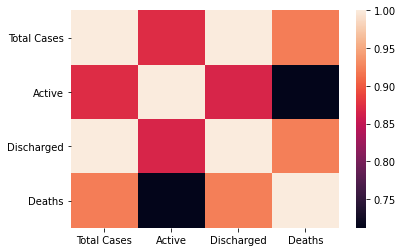

In [6]:
#High Correlation between Total Cases and recovery(Discharged); Lowest Correlation between Active cases and Deaths
sns.heatmap(sub_df.corr())

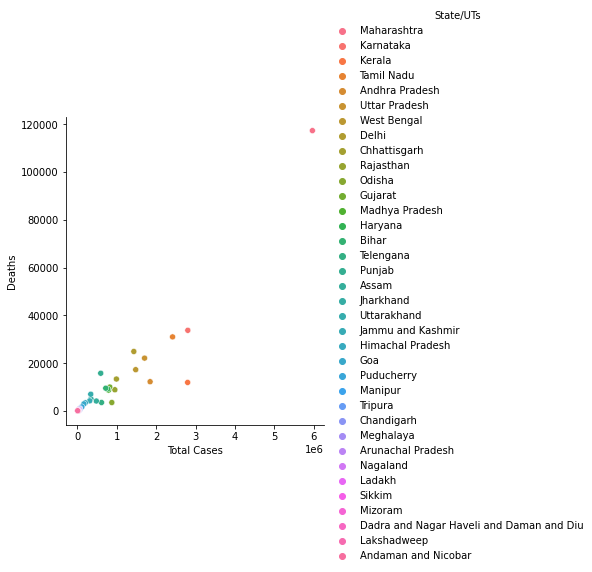

In [7]:
sns.relplot(x = 'Total Cases',y = 'Deaths',data = df,hue = 'State/UTs')
# Plot shows Highest cases and deaths in Maharashtra followed by Karnataka

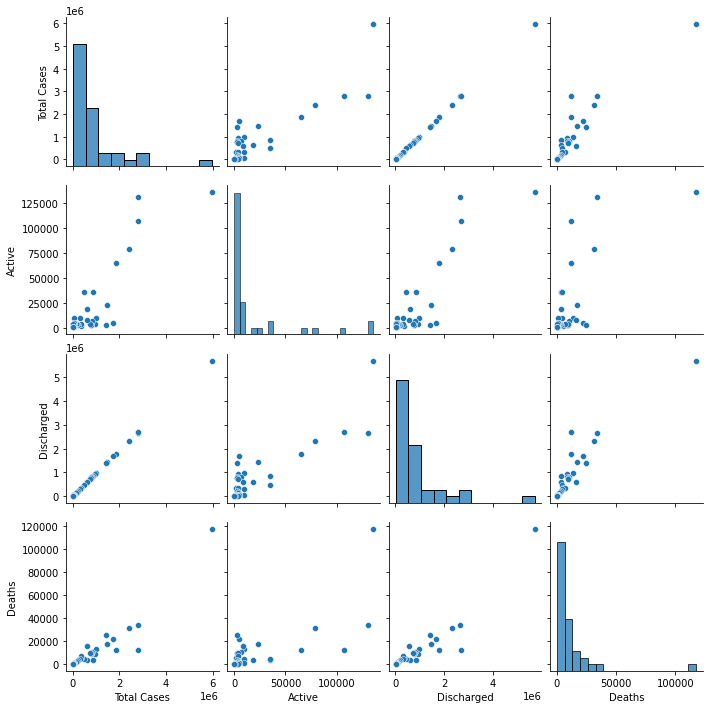

In [8]:
sns.pairplot(data=sub_df)

<AxesSubplot:xlabel='State/UTs'>

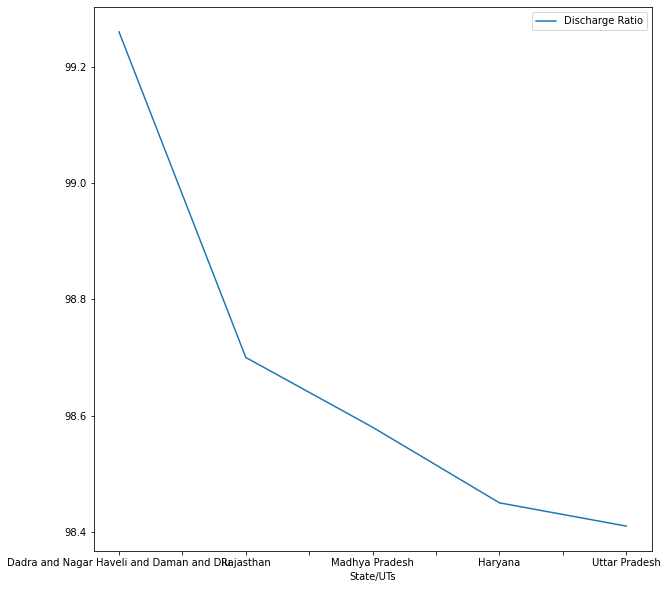

In [9]:
# Top 5 State/UTs according to Recovery
# Creating a separate dataframe with values sorted w.r.t Discharge Ratio

data_DR=df.sort_values(by="Discharge Ratio", ascending=False, axis=0)

fig,ax=plt.subplots(figsize=(10,10))

# Slicing the dataframe to plot only the top 5 states in which recovery is highest (require less attention)
data_DR.iloc[0:5].plot(kind="line",
              x="State/UTs",
              y="Discharge Ratio",
              ax=ax)

<AxesSubplot:xlabel='State/UTs'>

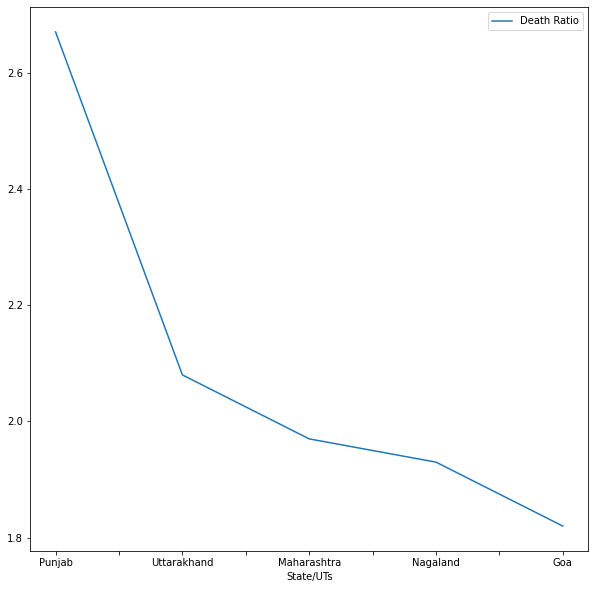

In [10]:
# Top 5 State/UTs according to Death per case 
# Creating a separate dataframe with values sorted w.r.t Death Ratio

data_DeathR=df.sort_values(by="Death Ratio", ascending=False, axis=0)

fig,ax=plt.subplots(figsize=(10,10))

# Slicing the dataframe to plot only the top 5 states in which death ratio is highest(these states require urgent attention)
data_DeathR.iloc[0:5].plot(kind="line",
              x="State/UTs",
              y="Death Ratio",
              ax=ax)